In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


1. Общие сведения

In [2]:
sample = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

Откроем первые 10 строк с данными:

In [3]:
sample.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


Посмотрим общую информацию:

In [4]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Убедимся, что в данных нет пропусков:

In [5]:
sample.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Убедимся, что нет явных дубликатов:

In [6]:
sample.duplicated().sum()

0

Оценим, какой процент наблюдаемых имеет болезни сердца и как это выглядит на гистограмме.

In [7]:
HeartDisease=sample['HeartDisease'].value_counts().reset_index()
a = HeartDisease['HeartDisease'].sum()
HeartDisease['percent'] = HeartDisease['HeartDisease']/a*100
np.round(HeartDisease,0)

,index,HeartDisease,percent
0,1,508,55.0
1,0,410,45.0


<AxesSubplot:>

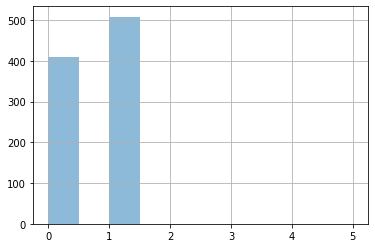

In [8]:
sample['HeartDisease'].hist(range =(0,5), alpha=0.5)

2. Анализ параметров выборки.

2. 1.Возраст

<AxesSubplot:>

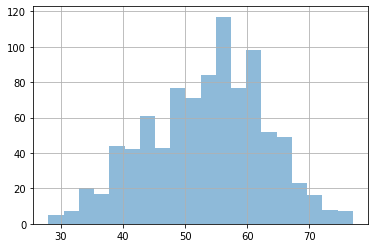

In [9]:
sample['Age'].hist(bins=20, alpha=0.5)

In [10]:
sample['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

Среднестатистический возраст согласно выборке 53-55 лет (это видно и на диаграмме и в таблице стат.характеристик). Минимальный возраст - 28 лет, максимальный - 77 лет. Межквартильный размах - возраст от 47 до 60 лет.

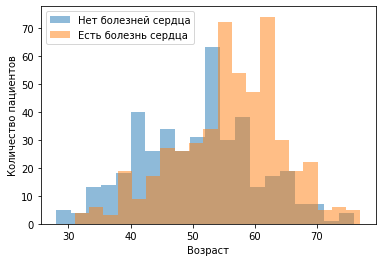

In [11]:
import matplotlib.pyplot as plt

sample.groupby('HeartDisease')['Age'].plot(kind='hist', bins=20, alpha=0.5)
plt.legend(['Нет болезней сердца', 'Есть болезнь сердца'])
plt.xlabel('Возраст')
plt.ylabel('Количество пациентов')
plt.show()

На графике видно, как после 55 лет учащаются случаи сердечных заболеваний.

2. 2.Пол

Изменим тип данных в столбце Sex с объекта на числовой:

In [12]:
def new_sex(x):
    if x == 'M':
        return 1
    return 0
sample['Sex']=sample['Sex'].apply(new_sex)

In [13]:
sex=sample['Sex'].value_counts().reset_index()
sex

,index,Sex
0,1,725
1,0,193


<AxesSubplot:ylabel='Sex'>

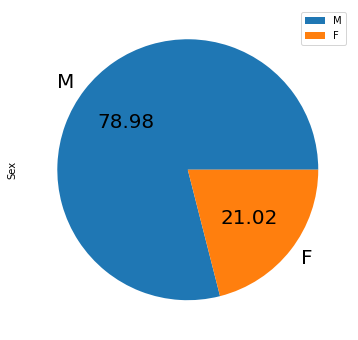

In [14]:
sex.plot.pie(y='Sex',labels=["M", "F"],autopct="%.2f", fontsize=20, figsize=(6, 6))

Большинство пациентов в выборке мужчины, женщин всего 21.02%.

In [15]:
sample.groupby(['HeartDisease','Sex']).agg(Patients=('Sex', 'count'))


Patients
HeartDisease Sex          
0            0         143
             1         267
1            0          50
             1         458

In [16]:
import plotly.express as px
ax = px.histogram(sample, x="Sex",color='HeartDisease', barmode='group', color_discrete_map={0:'#f5a287',1:'#8fafff'})
ax.show()

В сгруппированной таблице и на графике видно, что здоровых женщин почти в три раза больше, чем с болезнью сердца. У мужчин всё наоборот, больных мужчин в два раза больше, чем здоровых. Но так как в выборке очень мало женщин, нельзя утверждать что пол и болезни сердца как то связаны.

2. 3.Тип боли в груди.

In [17]:
ChestPainType=sample['ChestPainType'].value_counts().reset_index()
b = ChestPainType['ChestPainType'].sum()
ChestPainType['percent'] = ChestPainType['ChestPainType']/a*100
np.round(ChestPainType,0)

,index,ChestPainType,percent
0,ASY,496,54.0
1,NAP,203,22.0
2,ATA,173,19.0
3,TA,46,5.0


[TA: Типичная стенокардия, ATA: Атипичная стенокардия, NAP: Неангинальная боль, ASY: Бессимптомное течение]

Из таблицы видно, что у 54% пациентов бессимптомное течение болезни.

In [18]:
ax = px.histogram(sample, x="ChestPainType",color='HeartDisease', barmode='group',color_discrete_map={0:'#f5a287',1:'#8fafff'})
ax.show()

На графике видно, что пациенты с атипичной стенокардией реже других имеют сердечные заболевания, среди пациентов с неагинальной болью почти в два раза больше здоровых, а вот среди пациентов с бессимптомным течением болезни в 4 раза больше людей с сердечными заболеваниями. 

2. 4.Артериальное давление в состоянии покоя.

<AxesSubplot:>

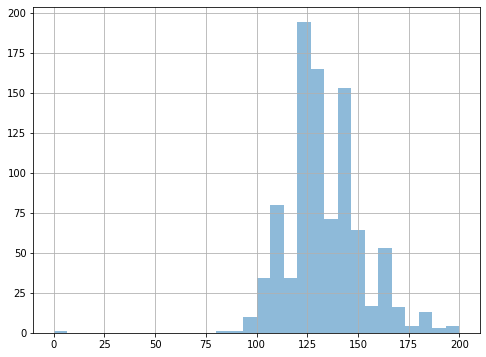

In [19]:
sample['RestingBP'].hist(bins=30, alpha=0.5, figsize=(8, 6))

In [20]:
sample['RestingBP'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

На графике мы видим, что давление в состоянии покоя у большинства пациентов 120-140 мм.рт.ст. (нормальное давление). Максимальное давление в выборке - 200 мм.рт.ст. 

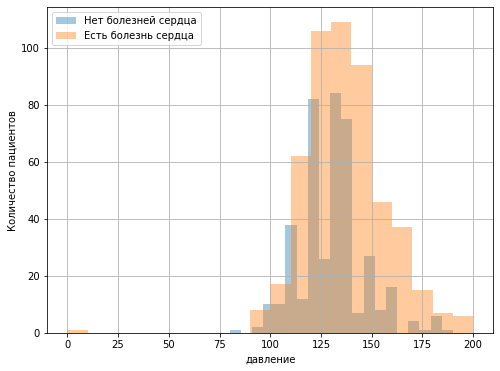

In [21]:
sample.groupby('HeartDisease')['RestingBP'].plot(kind='hist', bins=20, alpha=0.4, grid = True,figsize=(8, 6))
plt.legend(['Нет болезней сердца', 'Есть болезнь сердца'])
plt.xlabel('давление')
plt.ylabel('Количество пациентов')
plt.show()

Давление выше 140 мм.рт.ст. чаще встречается у пациентов с сердечными заболеваниями. Пациенты с максимальным давлением 200 мм.рт.ст. имеют проблемы с сердцем.

Посмотрим, есть ли взаимосвязь между возрастом и артериальным давлением:

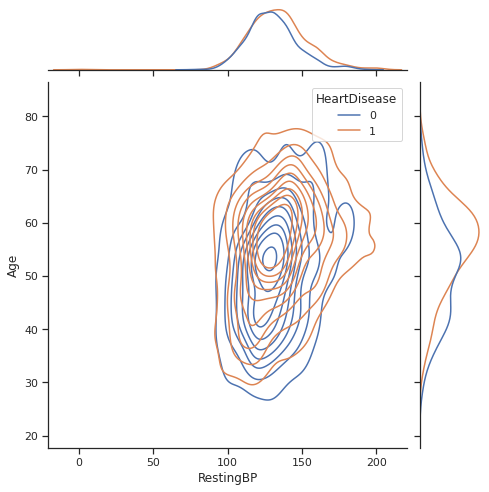

In [22]:
import seaborn as sns
sns.set_theme(style="ticks")
f = sns.jointplot(
    data=sample,
    x="RestingBP", y="Age", hue='HeartDisease',kind="kde", height=7, ratio=5)

Есть небольшая взаимосвязь. После 53 лет виден рост числа пациентов с болезнями сердца и повышенным артериальным давлением. 

2. 5.Холестерин сыворотки.

<AxesSubplot:>

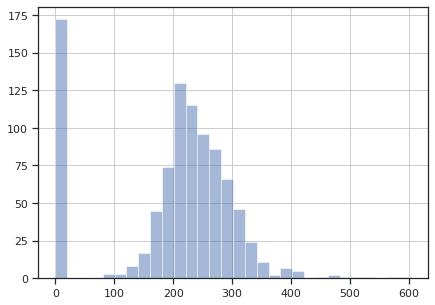

In [23]:
sample['Cholesterol'].hist(bins=30, alpha=0.5, figsize=(7, 5))

In [24]:
sample['Cholesterol'].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

Средний показатель холестерина по выборке - 198 мм/дл, большинство пациентов находятся в диапазоне 200 - 250 мм/дл. Максимальный уровень холестерина - 603 мм/дл.

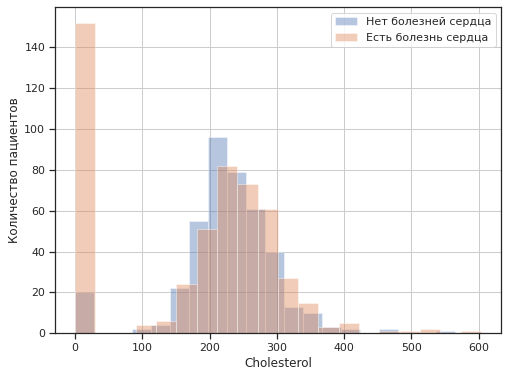

In [25]:
sample.groupby('HeartDisease')['Cholesterol'].plot(kind='hist', bins=20, alpha=0.4, grid = True,figsize=(8, 6))
plt.legend(['Нет болезней сердца', 'Есть болезнь сердца'])
plt.xlabel('Cholesterol')
plt.ylabel('Количество пациентов')
plt.show()

In [26]:
c = pd.qcut(sample['Cholesterol'], 5).reset_index()
c['HeartDisease'] = sample['HeartDisease']
x = c.groupby(['HeartDisease','Cholesterol']).agg(Patients=('Cholesterol', 'count'))
x['Parcent'] = x['Patients']/x['Patients'].sum()*100
np.round(x,0)

Patients  Parcent
HeartDisease Cholesterol                       
0            (-0.001, 134.8]        25      3.0
             (134.8, 209.0]        113     12.0
             (209.0, 238.2]         98     11.0
             (238.2, 276.0]         97     11.0
             (276.0, 603.0]         77      8.0
1            (-0.001, 134.8]       159     17.0
             (134.8, 209.0]         74      8.0
             (209.0, 238.2]         82      9.0
             (238.2, 276.0]         89     10.0
             (276.0, 603.0]        104     11.0

После отметки в 250 мм/дл пациенты с болезнями сердца встречаются чаще. Еще более отчетливо это видно в таблице (чем выше холестерин, тем больше становиться пациентов с сердечными болезнями и наоборот).

2. 6.Уровень сахара в крови натощак

In [27]:
FastingBS=sample['FastingBS'].value_counts().reset_index()
FastingBS

,index,FastingBS
0,0,704
1,1,214


<AxesSubplot:ylabel='FastingBS'>

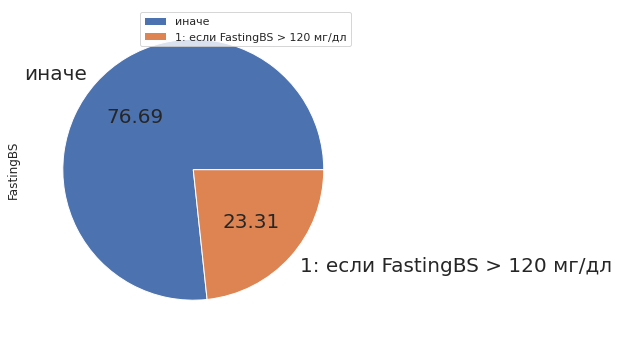

In [28]:
FastingBS.plot.pie(y='FastingBS',labels=["иначе", "1: если FastingBS > 120 мг/дл"],autopct="%.2f", fontsize=20, figsize=(6, 6))

In [29]:
ax = px.histogram(sample, x="FastingBS",color='HeartDisease', barmode='group',color_discrete_map={0:'#f5a287',1:'#8fafff'})
ax.show()

Пациентов с положительным тестом (уровень сахара в крови натощак больше 120 мг/дл) - 23.3%. При этом среди таких пациетов только 44 не имеют сердечных заболеваний, 170 - имеют.

2. 7.ЭКГ в покое.

In [30]:
RestingECG=sample['RestingECG'].value_counts().reset_index()
RestingECG['percent'] = RestingECG['RestingECG']/RestingECG['RestingECG'].sum()*100
np.round(RestingECG,0)

,index,RestingECG,percent
0,Normal,552,60.0
1,LVH,188,20.0
2,ST,178,19.0


ЭКГ в покое: результаты электрокардиограммы в покое [норма: нормальная, ST: аномалия ST-T (инверсия зубца T и/или подъем или депрессия ST > 0,05 мВ), LVH: вероятная или определенная гипертрофия левого желудочка по критериям Эстеса]

In [31]:
ax = px.histogram(sample, x="RestingECG",color=sample['HeartDisease'].replace({0:'No', 1:'Yes'}), barmode='group',color_discrete_map={'No':'#f5a287','Yes':'#8fafff'})
ax.show()

60% пациентов имеют нормальную электрокардиограмму в покое. Среди них почти равное количество с болезнями сердца(285 человек) и без (267 человек). Самая значительная разница у пациентов с аномалией ST -почти в два раза больше пациентов с болезнями сердца. Гипертрофия левого желудочка тоже мало о чем говорит (пациентов с болезнями сердца больше, но не значительно).

2. 8.Максимальная достигнутая частота сердечных сокращений.

<AxesSubplot:>

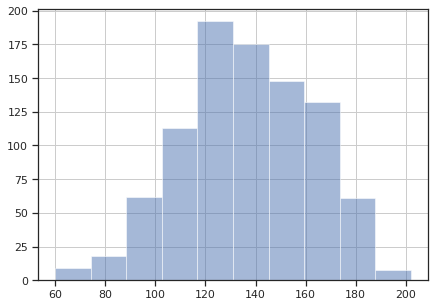

In [32]:
sample['MaxHR'].hist(alpha=0.5, figsize=(7, 5))

In [33]:
sample['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

Минимальное значение - 60, максимальное - 202. Большинство пациентов имеют максимальную частоту сердечных сокращений - 120-160. 

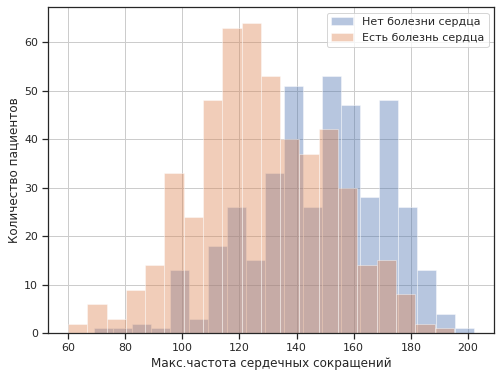

In [34]:
sample.groupby('HeartDisease')['MaxHR'].plot(kind='hist', bins=20, alpha=0.4, grid = True,figsize=(8, 6))
plt.legend(['Нет болезни сердца','Есть болезнь сердца'])
plt.xlabel('Mакс.частота сердечных сокращений')
plt.ylabel('Количество пациентов')
plt.show()

У пациентов с максимальной частотой сердечных сокращений до 130 заболевания сердца встречаются намного чаще. И наоборот, у пациентов с максимальной частотой сердечных сокращений выше 140 болезни сердца встречаются реже.

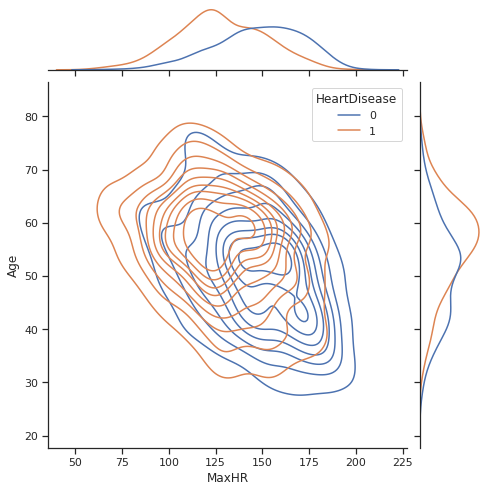

In [35]:
sns.set_theme(style="ticks")
f = sns.jointplot(
    data=sample,
    x="MaxHR", y="Age", hue='HeartDisease',kind="kde", height=7, ratio=5)

Определенно есть зависимость частоты сердечных сокращений от возраста. Это хорошо видно на графике. У более молодых пациентов, не имеющих заболеваний сердца максимальная частота сердечных сокращений - 200, у пожилых людей (после 60 лет) частота сердечных сокращений не превышает 125, причем у людей с заболеваниями этот показатель еще ниже.

2. 9.Физическая стенокардия.

In [36]:
ExerciseAngina=sample['ExerciseAngina'].value_counts().reset_index()
ExerciseAngina['percent'] = ExerciseAngina['ExerciseAngina']/ExerciseAngina['ExerciseAngina'].sum()*100
np.round(ExerciseAngina,0)

,index,ExerciseAngina,percent
0,N,547,60.0
1,Y,371,40.0


In [37]:
ax = px.histogram(sample, x="ExerciseAngina",color=sample['HeartDisease'].replace({0:'No', 1:'Yes'}), barmode='group',color_discrete_map={'No':'#f5a287','Yes':'#8fafff'})
ax.show()

60% пациентов не имеют стенокардии при физической нагрузке. Среди пациентов, у которых есть стенокардия при физических нагрузках, почти все имеют заболевания сердца(55 - здоровы, 316 - с болезнями сердца, вероятность сердечного заболевания в группе с пложительной стенокардией при физ. нагрузке - 0,85). 

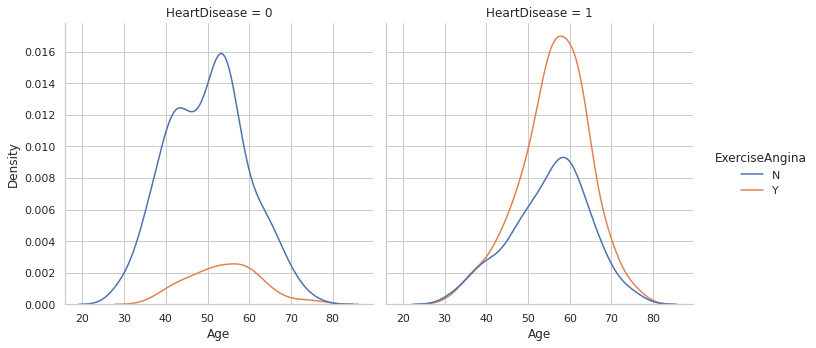

In [38]:
sns.set_theme(style="whitegrid")

sns.displot(
    data=sample,
    x="Age", hue="ExerciseAngina",
    col="HeartDisease", kind="kde")

На первом графике видно, что у здоровых пациентов в основном нет стенокардии при физических нагрузках и их возраст в основоном - 40 - 55 лет. На втором графике пациенты с болезнями сердца, здесь больше пациентов которые имеют стенокардию при физической нагрузке и их возраст в основном 55-65 лет (можно сказать, что эта группа старше предыдущей). 

2. 10.Числовое значение, измеренное в депрессии.

<AxesSubplot:>

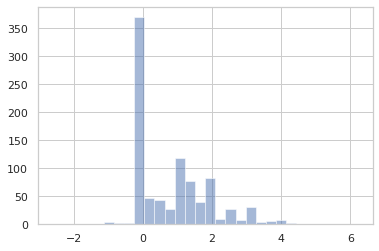

In [39]:
sample['Oldpeak'].hist(bins=30, alpha=0.5)

In [40]:
sample['Oldpeak'].describe()

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

Числовое значение, измеренное в депресии, в основном находится в пределах от 0 до 1.5. Максимальное значение 6.2

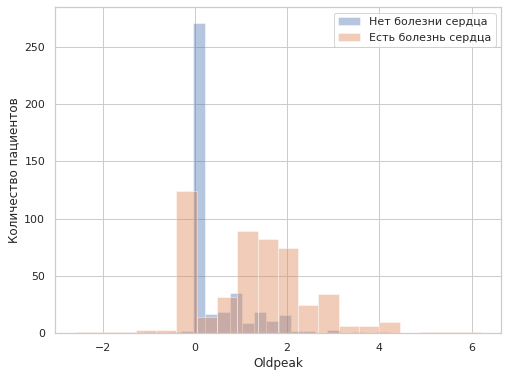

In [41]:
sample.groupby('HeartDisease')['Oldpeak'].plot(kind='hist', bins=20, alpha=0.4, grid = True,figsize=(8, 6))
plt.legend(['Нет болезни сердца','Есть болезнь сердца'])
plt.xlabel('Oldpeak')
plt.ylabel('Количество пациентов')
plt.show()

У здоровых пациентов oldpeak находится в пределах от 0 до 2. У пациентов с болезнями сердца - в пределах от 0 до 4.5.

In [42]:
w = pd.cut(sample['Oldpeak'], 5).reset_index()
w['HeartDisease'] = sample['HeartDisease']
k = w.groupby(['HeartDisease','Oldpeak']).agg(Patients=('Oldpeak', 'count'))
k['Parcent'] = k['Patients']/k['Patients'].sum()*100
np.round(k,0)

Patients  Parcent
HeartDisease Oldpeak                           
0            (-2.609, -0.84]         1      0.0
             (-0.84, 0.92]         319     35.0
             (0.92, 2.68]           85      9.0
             (2.68, 4.44]            5      1.0
             (4.44, 6.2]             0      0.0
1            (-2.609, -0.84]         6      1.0
             (-0.84, 0.92]         173     19.0
             (0.92, 2.68]          270     29.0
             (2.68, 4.44]           56      6.0
             (4.44, 6.2]             3      0.0

В таблице также видно, что доля здоровых пациентов при повышении показателя oldpeak резко снижается. У больных пациентов сначала идет рост в зависимости от oldpeak, после отметки 2.7 плавное снижение. 

2. 11.Наклон сегмента ST.

In [43]:
ST_Slope=sample['ST_Slope'].value_counts().reset_index()
ST_Slope['percent'] = ST_Slope['ST_Slope']/ST_Slope['ST_Slope'].sum()*100
np.round(ST_Slope,0)

,index,ST_Slope,percent
0,Flat,460,50.0
1,Up,395,43.0
2,Down,63,7.0


ST_Slope: наклон сегмента ST пикового упражнения [Вверх: восходящий, Плоский: плоский, Вниз: нисходящий]

In [44]:
ax = px.histogram(sample, x="ST_Slope",color=sample['HeartDisease'].replace({0:'No', 1:'Yes'}), barmode='group',color_discrete_map={'No':'#f5a287','Yes':'#8fafff'})
ax.show()

Пациенты с восходящим наклоном чаще находятся в группе не имеющих сердечных заболеваний. Пациенты с плоским наклоном наоборот в основном в группе с болезнями сердца. Пациенты с нисходящим уклоном тоже в чаще попадают в группу с сердечными заболеваниями.  

3. Выбросы.

In [45]:
fig = px.box(sample, x='Age')
fig.show()

Показатель возраст не имеет выбрасов.

In [46]:
fig = px.box(sample, x='RestingBP')
fig.show()

Артериальное давление не может быть равно нулю. Это явный выброс. Удалим эти строки из таблицы.

In [47]:
sample_new = sample.copy()
sample_new = sample_new[sample_new['RestingBP'] != 0]
print('Удалили данных:',(1-len(sample_new['RestingBP'])/len(sample['RestingBP']))*100, 'процентов')

Удалили данных: 0.10893246187363426 процентов


In [48]:
fig = px.box(sample, x='Cholesterol')
fig.show()

Холестерин не должен быть равен нулю. Опять выброс. Удалим и эти данные.

In [49]:
#sample_new = sample_new[sample_new['Cholesterol'] != 0]
#print('Удалили данных:',(1-len(sample_new['Cholesterol'])/len(sample['Cholesterol']))*100, 'процентов')

Если удалить холестерин равный нулю, то мы потерям 18 процентов данных. Это очень много, исследование при такой потере данных станет не достоверным. Заменим нули на неизвестное значение. 

In [50]:
sample_new['Cholesterol'] = sample_new['Cholesterol'].replace({0:'unknown'})

In [51]:
fig = px.box(sample, x='MaxHR')
fig.show()

Максимальная частота сердечных сокращений имеет два выброса. Это реальные показатели пациентов, просто очень редкие. Их удаление исказит данные.

In [52]:
fig = px.box(sample, x='Oldpeak')
fig.show()

В параметре oldpeak есть выбросы. Отрицательные значения. Удалим их.

In [53]:
sample_new = sample_new[sample_new['Oldpeak'] >= 0]
print('Удалили данных:',(1-len(sample_new['Oldpeak'])/len(sample['Oldpeak']))*100, 'процентов')

Удалили данных: 1.525054466230935 процентов


4. Оценка взаимосвязей.

Оценим взаимосвязь и построим heatmap:

In [54]:
! pip install phik

Поскольку коэффициент корреляции Пирсона нам показывает только линейную взаимосвязь, применим коэффициент корреляции Phik, он учитывает взаимосвязь между категориальными переменными, а также фиксирует нелинейную зависимость.

In [55]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

Посмотрим, как изменилась взаимосвязь параметров с наличием или отсутсвием болезней сердца у пациентов после очистки выборки от выбросов.

In [56]:
phik_sample = sample.phik_matrix()
phik_sample_new = sample_new.phik_matrix()

interval columns not set, guessing: ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
interval columns not set, guessing: ['Age', 'Sex', 'RestingBP', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [57]:
phik_sample['HeartDisease'].sort_values(ascending=False)

HeartDisease      1.000000
ChestPainType     0.745661
ExerciseAngina    0.697276
Oldpeak           0.571560
MaxHR             0.526292
Sex               0.455551
Cholesterol       0.430216
FastingBS         0.401149
ST_Slope          0.393847
Age               0.360326
RestingBP         0.128248
RestingECG        0.059519
Name: HeartDisease, dtype: float64

In [58]:
phik_sample_new['HeartDisease'].sort_values(ascending=False)

HeartDisease      1.000000
ChestPainType     0.744256
ExerciseAngina    0.702739
Oldpeak           0.580454
MaxHR             0.525949
Cholesterol       0.495585
Sex               0.455791
ST_Slope          0.393197
FastingBS         0.386370
Age               0.359835
RestingBP         0.175390
RestingECG        0.061636
Name: HeartDisease, dtype: float64

Наибольшая связь наблюдается между наличием болезней сердца и типом боли в груди не зависимо от выбросов в выборке, а также наличием стенокардии при физической нагрузке. Высокая взаимосвязь между болезнями сердца наблюдается и с параметрами oldpeak и максимально достигнутой частотой сердечных сокращений. Чуть ниже связь между болезнями сердца и холестерином, полом, наклоном сегмента ST. Тут важно отметить, что после очистки выборки от выбросов выяснилось, что холестерин имеет намного большую взаимосвязь с болезнями сердца, чем пол, а наклон сегмента ST - чем уровень сахара в крови. Возраст и уровень сахара уже слабее коррелируют с болезнями сердца. Слабая взаимосвязь между болезнями сердца показателями артериального давления в покое, ЭКГ в покое.

Тепловая карта взаимосвязей:

<AxesSubplot:>

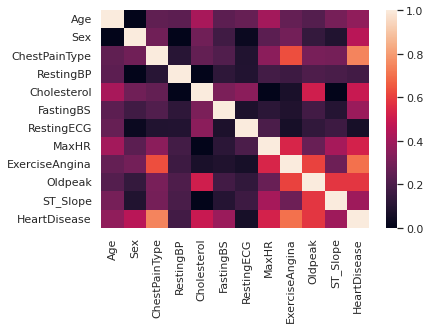

In [59]:
sns.heatmap(phik_sample_new)

5. Проверка гипотез.

5. 1.Проверка гипотезы: у мужчин чаще встречаются болезни сердца, чем у женщин.

H_0: мужчины с болезнями сердца = женщины с болезнями сердца

H_1: мужчины с болезнями сердца ≠ женщины с болезнями сердца

alpha = 0.01

In [60]:
from scipy import stats as st
men = sample_new[sample_new['Sex'] == 1]
women = sample_new[sample_new['Sex'] == 0]

In [61]:
results = st.ttest_ind(men['HeartDisease'],women['HeartDisease'], equal_var = False)
print(results.pvalue) 
print('Не получилось отвергнуть нулевую гипотезу') 

2.3997049867191644e-21
Не получилось отвергнуть нулевую гипотезу


5. 2.Проверка гипотезы: если у пациента уровень сахара в крови больше 120 мг/дл, то он чаще имеет сердечные заболевания.

H_0: пациенты с уровнем сахара выше 120 мг/дл = пациенты с уровнем сахара ниже 120 мг/дл

H_1: пациенты с уровнем сахара выше 120 мг/дл ≠ пациенты с уровнем сахара ниже 120 мг/дл

alpha = 0.01

In [62]:
sh_120 = sample_new[sample_new['FastingBS'] == 1]
sh = sample_new[sample_new['FastingBS'] == 0]

In [63]:
results = st.ttest_ind(sh_120['HeartDisease'],sh['HeartDisease'], equal_var = False)
print(results.pvalue) 
print('Не получилось отвергнуть нулевую гипотезу') 

2.11720748291303e-17
Не получилось отвергнуть нулевую гипотезу


5. 3.Проверка гипотезы: пациенты старше 70 лет имеют сердечные заболевания.
 
Н_0: пациенты старше 70 лет = пациенты моложе 70 лет

H_1: пациенты старше 70 лет ≠ пациенты моложе 70 лет

alpha = 0.01

In [64]:
age_70 = sample_new[sample_new['Age'] > 70]
age = sample_new[sample_new['Age'] <= 70]

In [65]:
results = st.ttest_ind(age_70['HeartDisease'],age['HeartDisease'],equal_var = False)
print(results.pvalue) 
print('Опровергаем нулевую гипотезу') 

0.2444523976450731
Опровергаем нулевую гипотезу


5. 4.Проверка гипотезы: пациенты с повышенным холестерином чаще страдают от сердечных заболеваний.
 
Н_0: пациенты с повышенным холестерином = пациенты с нормальным холестерином

H_1: пациенты с повышенным холестерином ≠ пациенты с нормальным холестерином

alpha = 0.01

In [66]:
chol = sample[sample['Cholesterol'] > 300]
chol_n = sample[(sample['Cholesterol'] <= 300)&(sample['Cholesterol']!=0)]
results = st.ttest_ind(chol['HeartDisease'],chol_n['HeartDisease'],equal_var = False)
print(results.pvalue) 
print('Отвергаем нулевую гипотезу') 

0.21761351807799867
Отвергаем нулевую гипотезу


5. 5.Проверка гипотезы: пациенты с повышенным артериальным давлением в покое чаще страдают от сердечных заболеваний.
 
Н_0: пациенты с повышенным АД = пациенты с нормальным АД

H_1: пациенты с повышенным АД ≠ пациенты с нормальным АД

alpha = 0.01

In [67]:
ad = sample_new[sample_new['RestingBP'] > 160]
ad_n = sample_new[sample_new['RestingBP'] <= 160]
results = st.ttest_ind(ad['HeartDisease'],ad_n['HeartDisease'],equal_var = False)
print(results.pvalue) 
print('Отвергаем нулевую гипотезу')

0.01574470946539596
Отвергаем нулевую гипотезу


5. 6.Проверка гипотезы: пациенты со стенокардией вызванной физической нагрузкой имеют сердечные заболевания.
 
Н_0: пациенты со стенокардией при физ.нагрузке = пациенты без стенокардии при физ.нагрузке

H_1: пациенты со стенокардией при физ.нагрузке ≠ пациенты без стенокардии при физ.нагрузке

alpha = 0.01

In [68]:
def new_EA(x):
    if x == 'Y':
        return 1
    return 0
sample_new['ExerciseAngina']=sample_new['ExerciseAngina'].apply(new_EA)


In [69]:
ea = sample_new[sample_new['ExerciseAngina'] == 1]
ea_n = sample_new[sample_new['ExerciseAngina'] == 0]
results = st.ttest_ind(ea['HeartDisease'],ea_n['HeartDisease'],equal_var = False)
print(results.pvalue) 
print('Не получилось отвергнуть нулевую гипотезу')

2.2771518489502998e-63
Не получилось отвергнуть нулевую гипотезу


5. 7.Проверка гипотезы: пациенты с максимально достигнутой частотой сердечных сокращений 120 имеют болезни сердца. 
 
Н_0: пациенты с максимально достигнутой частотой сердечных сокращений 120 = пациенты с максимально достигнутой частотой сердечных сокращений выше 120

H_1: пациенты с максимально достигнутой частотой сердечных сокращений 120 ≠ пациенты с максимально достигнутой частотой сердечных сокращений выше 120

alpha = 0.01

In [70]:
maxHR_120 = sample_new[sample_new['MaxHR'] <= 120]
maxHR = sample_new[sample_new['MaxHR'] > 120]
results = st.ttest_ind(maxHR_120['HeartDisease'],maxHR['HeartDisease'],equal_var = False)
print(results.pvalue) 
print('Не получилось отвергнуть нулевую гипотезу')

1.3068653157891516e-19
Не получилось отвергнуть нулевую гипотезу


5. 8.Проверка гипотезы: пациенты с oldspeak выше 3.0 чаще имеют болезни сердца. 
 
Н_0: пациенты с oldspeak выше 3 = пациенты с oldspeak ниже 3

H_1: пациенты с oldspeak выше 3 ≠ пациенты с oldspeak ниже 3

alpha = 0.01

In [71]:
old_n = sample_new[sample_new['Oldpeak'] < 3.0]
old = sample_new[sample_new['Oldpeak'] >= 3.0]
results = st.ttest_ind(old['HeartDisease'],old_n['HeartDisease'],equal_var = False)
print(results.pvalue) 
print('Не получилось отвергнуть нулевую гипотезу')

5.996798754299351e-14
Не получилось отвергнуть нулевую гипотезу


Можно сделать вывод, что только три гипотезы из восьми удалось подтвердить: пациенты старше 70 лет имеют болезни сердца, пациенты с уровнем холестерина выше 300 мг/дл имеют болезни сердца и пациенты с артериальным  давлением в покое свыше 160 мм.рт.ст. чаще имеют болезни сердца. Остальные гипотезы не подтвердились.  